# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

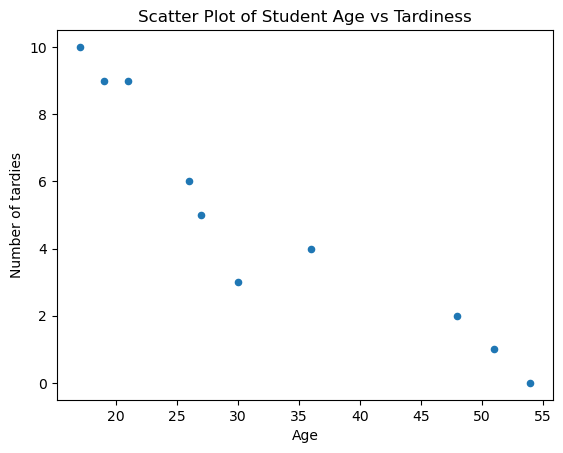

In [3]:
# Your code here.
student_data.plot.scatter(x = 'Age', y= 'Tardies', s=None, c=None)
plt.title("Scatter Plot of Student Age vs Tardiness")
plt.xlabel('Age')
plt.ylabel('Number of tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# Yes, the scatterplot seems to show a negative trend.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
# COVARIANCE: 
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
# CORRELATION: 
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [7]:
# Covariance is an indicator of the extent to which 2 variables are dependent on each other. A higher number denotes higher dependency. 
# Correlation is a statistical measure that indicates how strongly two variables are related

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [9]:
# Use the LinearRegression() function from the sklearn library used to summarize & predict the data
lr = LinearRegression()

In [10]:
lr.fit(
    X = student_data[["Age"]], # Set "Age" as the independent variable (what we know) 
    y = student_data.Tardies) # Set "Tardies" as the dependent variable (what we want to predict) 

LinearRegression()

In [11]:
# Create a function for a linear regression, with Age as the unique argument and returns the predicted number of tardies. 
# For the function we have to set the slope (coef_) and the incercept (incercept_).
def number_of_tardies (Age):
    coef_ = lr.coef_
    intercept_ = lr.intercept_
    result =  Age * coef_ + intercept_

    return result[0]

In [12]:
# Create a new column called "prediction_through_scikitlerarn" with the result of applying the previous function to the Age column to get the predicted number of tardies per student.
student_data["prediction_through_scikitlerarn"] = student_data["Age"].apply(number_of_tardies)

In [13]:
student_data

,Age,Tardies,prediction_through_scikitlerarn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

In [14]:
X = student_data[["Age"]]
y = student_data.Tardies

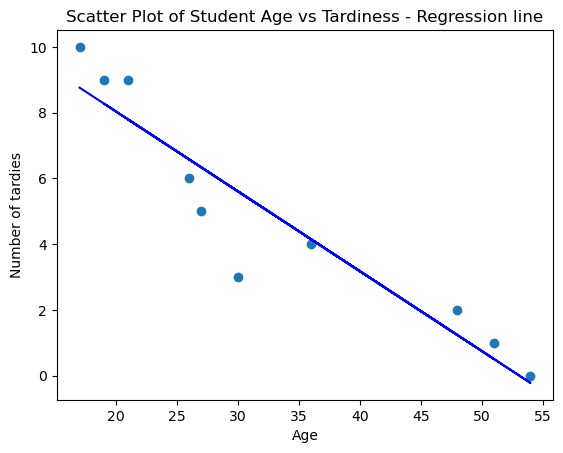

In [15]:
# Your code here.
plt.scatter(X, y)
plt.plot(student_data.Age, student_data["prediction_through_scikitlerarn"], c="blue", label="Prediction")
plt.title("Scatter Plot of Student Age vs Tardiness - Regression line")
plt.xlabel('Age')
plt.ylabel('Number of tardies');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [16]:
result = smf.ols("Tardies ~ Age", data=student_data).fit()
result.summary()

C:\Users\Laura\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 May 2023   Prob (F-statistic):           5.57e-05
Time:                        17:05:43   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Your response here. 
# We can observe a negative linear correlation, meaning that as the age increases the nuber of tardies decreases.
# The R-squared states that this model xplains quite good the corelation between the two variables, specifically a 87% of the correlation can be explained by the linear regression model
# The number of residuals is 8 out of 10 observations, meaning that 2 of the observations are completely explained by the linear regression model. 
# We can ensure that whith a 95% of confidence the coef of the intercept of the linear regression model is going to fall within a range of 10.328 and 15.450
# We can ensure that whith a 95% of confidence the coef of the slope of the linear regressionn model is going to fall within a range of -0.315 and -0.170

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [19]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
# Your response here. 
df = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
df.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [21]:
df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [22]:
# Most important variables in determining CO2 emissions: Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year.
# Less important variables in determining CO2 emissions: Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here. 
# I am going to use Multiple Linear Regression as there are several variables that can potentially explain the CO2 emissions.

In [28]:
results = smf.ols("df['CO2 Emission Grams/Mile'] ~ Cylinders + df['Fuel Barrels/Year'] + df['Combined MPG'] + df['Fuel Cost/Year']", data=df).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [30]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     df['CO2 Emission Grams/Mile']   R-squared:                       0.980
Model:                                       OLS   Adj. R-squared:                  0.980
Method:                            Least Squares   F-statistic:                 4.470e+05
Date:                           Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                                   17:06:34   Log-Likelihood:            -1.5226e+05
No. Observations:                          35952   AIC:                         3.045e+05
Df Residuals:                              35947   BIC:                         3.046e+05
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders                   1.0448      0.080     12.993      0.000       0.887       1.202
df['Fuel Barrels/Year']    19.6271      0.060    329.809      0.000      19.510      19.744
df['Combined MPG']         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
df['Fuel Cost/Year']        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The Multiple Linear Regression explains with a 98% the correlation between the variables chosen. 
# The P value is higher than t, meaning that the coef for each variable is not statistically significant from the confidence interval, so its value is it is expected.

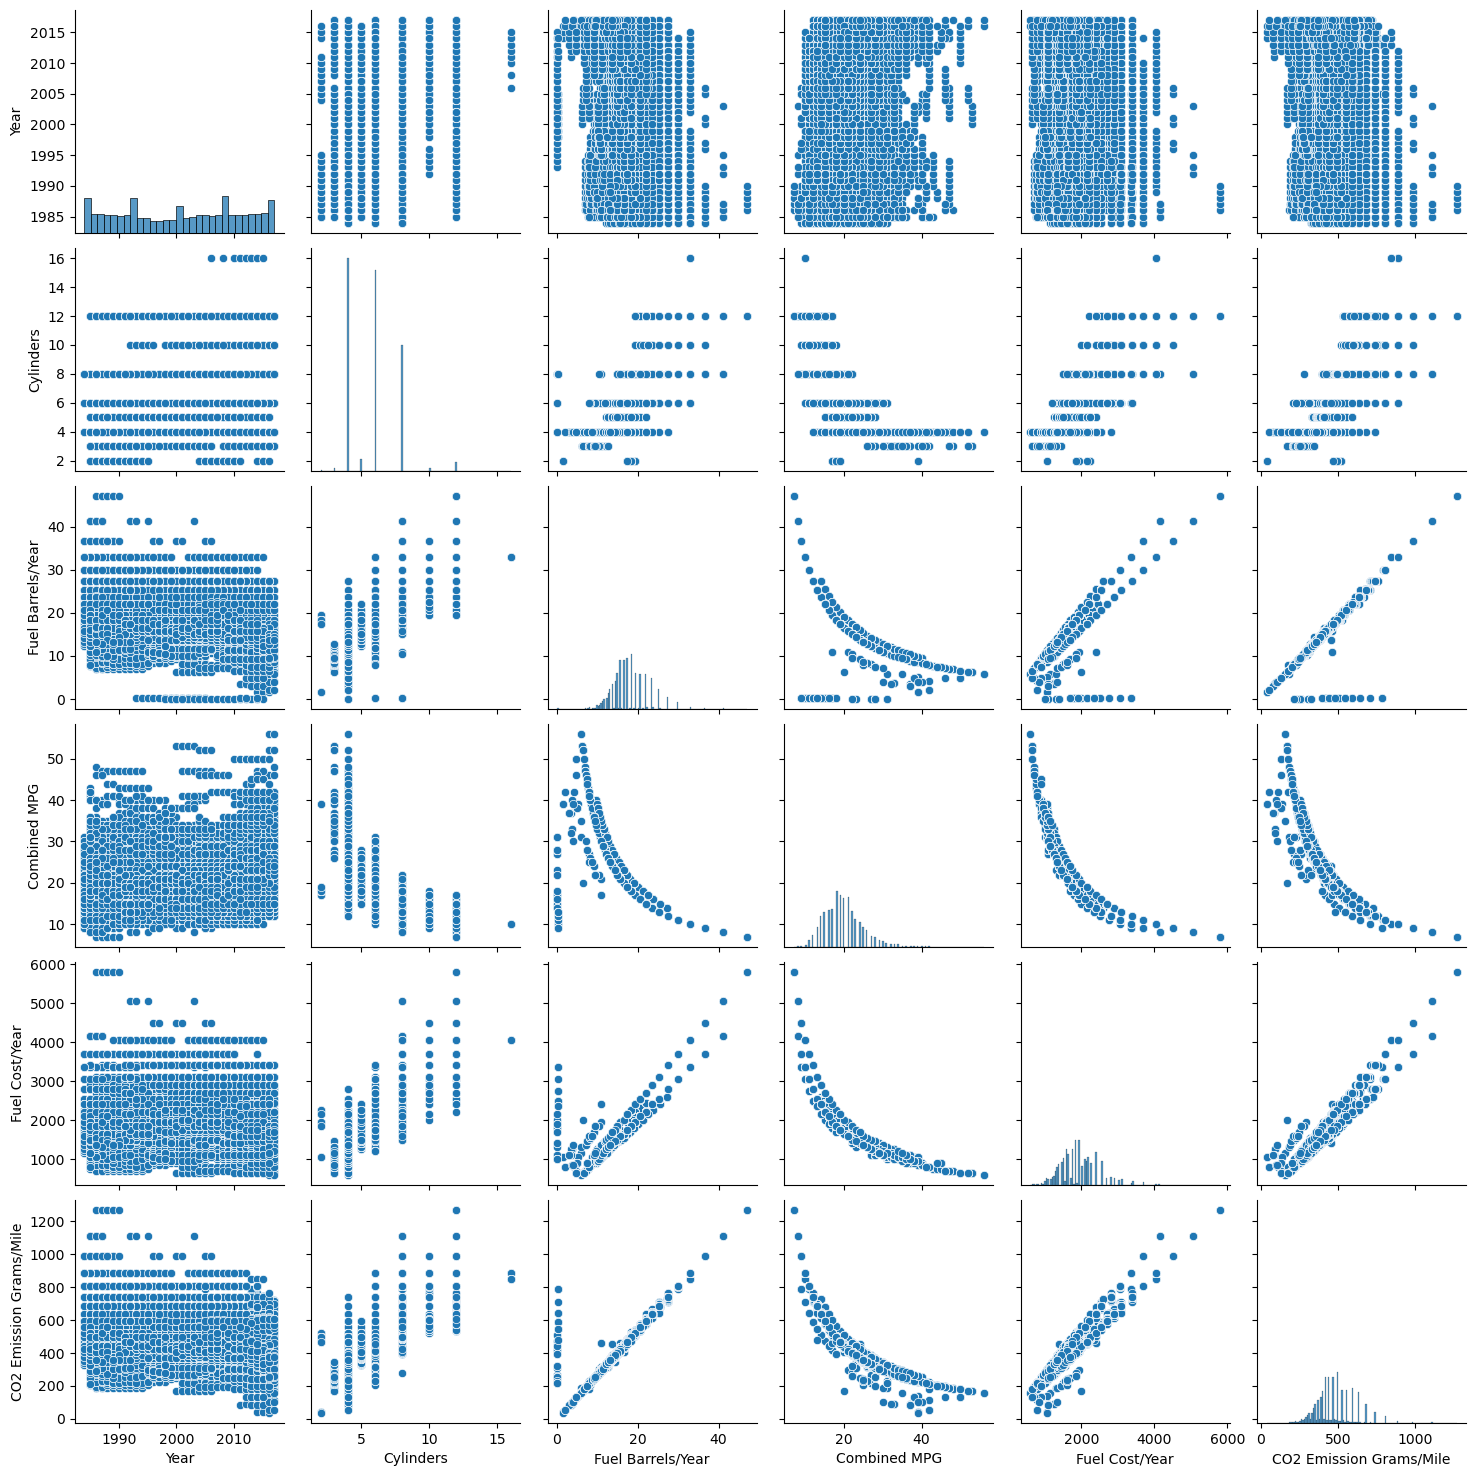

In [25]:
sns.pairplot(df);

In [61]:
# Year:
# As said before, the year variable is not the best option to predict the does not explain the CO2 emissions.
# In the case of 'Fuel Barrels/Years' and 'Fuel Cost/Year' there seems to be a positive linear correlation with the CO2 emissions.
# Regarding the 'Combined MPG' variable, there seems to be a negative curve correlation with the CO2 emissions.

In [ ]:
def CO2_emissions (x):
    coef_ = lr.coef_
    intercept_ = lr.intercept_
    result =  x * coef_ + intercept_

    return result[0]

In [56]:
lr = LinearRegression()

In [ ]:
# Linear regression for Fuel Barrels/Year and CO2 Emission Grams/Mile

In [51]:
lr.fit(
    X = df[["Fuel Barrels/Year"]],
    y = df['CO2 Emission Grams/Mile'])

LinearRegression()

In [53]:
df["prediction_through_scikitlerarn_Fuel_Barrels"] = df["Fuel Barrels/Year"].apply(CO2_emissions)

In [54]:
X = df[["Fuel Barrels/Year"]]
y = df['CO2 Emission Grams/Mile']

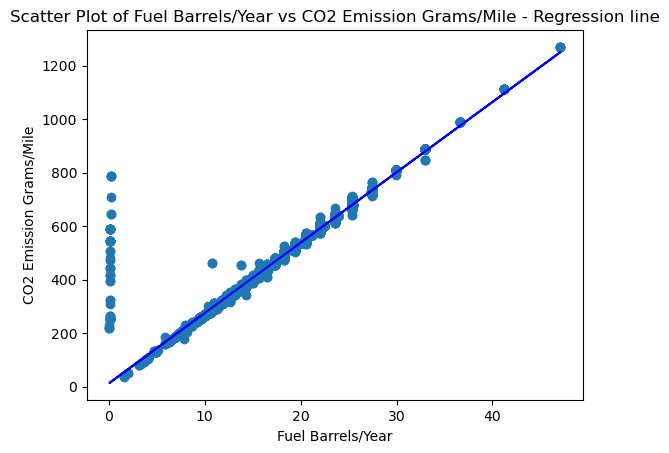

In [59]:
plt.scatter(X, y)
plt.plot(df["Fuel Barrels/Year"], df["prediction_through_scikitlerarn_Fuel_Barrels"], c="blue", label="Prediction")
plt.title("Scatter Plot of Fuel Barrels/Year vs CO2 Emission Grams/Mile - Regression line")
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile');

In [60]:
# Linear regression for Fuel Barrels/Year and CO2 Emission Grams/Mile

In [63]:
lr.fit(
    X = df[["Fuel Cost/Year"]],
    y = df['CO2 Emission Grams/Mile'])

LinearRegression()

In [64]:
df["prediction_through_scikitlerarn_Fuel_Cost"] = df["Fuel Cost/Year"].apply(CO2_emissions)

In [65]:
X = df[["Fuel Cost/Year"]]
y = df['CO2 Emission Grams/Mile']

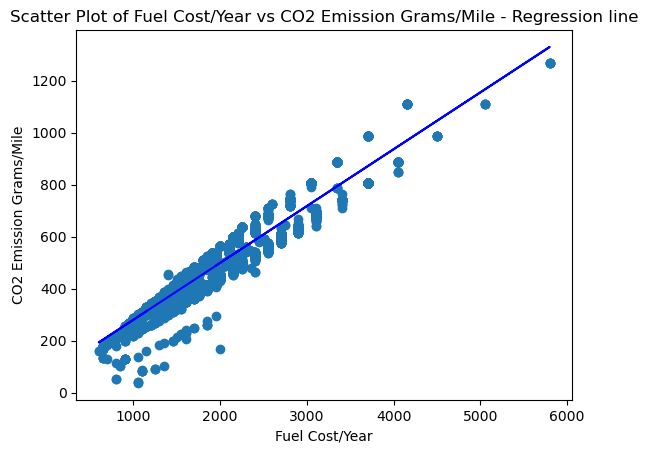

In [67]:
plt.scatter(X, y)
plt.plot(df["Fuel Cost/Year"], df["prediction_through_scikitlerarn_Fuel_Cost"], c="blue", label="Prediction")
plt.title("Scatter Plot of Fuel Cost/Year vs CO2 Emission Grams/Mile - Regression line")
plt.xlabel('Fuel Cost/Year')
plt.ylabel('CO2 Emission Grams/Mile');

In [ ]:
# Linear regression for Cylinders and CO2 Emission Grams/Mile

In [68]:
lr.fit(
    X = df[["Cylinders"]],
    y = df['CO2 Emission Grams/Mile'])

LinearRegression()

In [69]:
df["prediction_through_scikitlerarn_Cylinders"] = df["Cylinders"].apply(CO2_emissions)

In [70]:
X = df[["Cylinders"]]
y = df['CO2 Emission Grams/Mile']

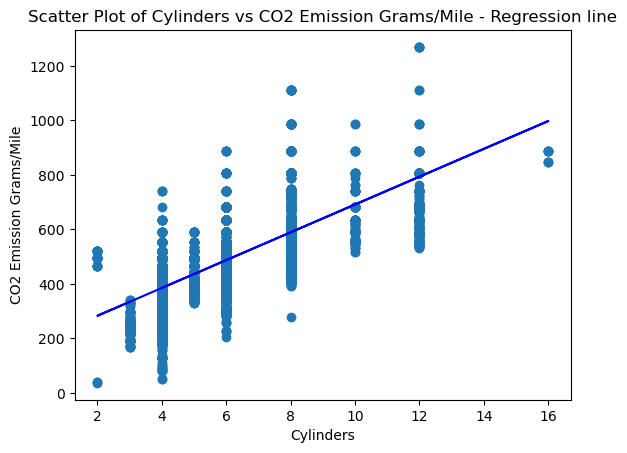

In [71]:
plt.scatter(X, y)
plt.plot(df["Cylinders"], df["prediction_through_scikitlerarn_Cylinders"], c="blue", label="Prediction")
plt.title("Scatter Plot of Cylinders vs CO2 Emission Grams/Mile - Regression line")
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission Grams/Mile');

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 